In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('buffer_chain.sp.prn', delim_whitespace=True, comment='*', skipfooter=2, engine='python')
# df.plot(x=df.columns[0], y=df.columns[1:])  # x is usually time or VIN
# plt.show()

/tmp/ipykernel_143368/2516979105.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('buffer_chain.sp.prn', delim_whitespace=True, comment='*', skipfooter=2, engine='python')


In [2]:
df

,Index,V(IN),V(VDD),V(VSS),V(OUT),V(XBUF:U0_A),V(XBUF:U0_Y),V(XBUF:U1_A),V(XBUF:U1_Y),V(XBUF:U2_A),...,V(XBUF:U7_A),V(XBUF:U7_Y),V(XBUF:U8_A),V(XBUF:U8_Y),V(XBUF:U9_A),V(XBUF:U9_Y),V(XBUF:U10_A),V(XBUF:U10_Y),V(XBUF:U11_A),V(XBUF:U11_Y)
0,0,0.00,2.0,0.0,1.999994,0.00,1.999970,1.999970,0.00002,0.000021,...,1.999969,0.00002,0.000021,1.99997,1.999970,0.00002,0.000021,1.99997,1.999970,0.00002
1,1,0.01,2.0,0.0,1.999994,0.01,1.999969,1.999968,0.00002,0.000021,...,1.999969,0.00002,0.000021,1.99997,1.999970,0.00002,0.000021,1.99997,1.999970,0.00002
2,2,0.02,2.0,0.0,1.999994,0.02,1.999967,1.999967,0.00002,0.000021,...,1.999969,0.00002,0.000021,1.99997,1.999970,0.00002,0.000021,1.99997,1.999970,0.00002
3,3,0.03,2.0,0.0,1.999994,0.03,1.999964,1.999964,0.00002,0.000021,...,1.999969,0.00002,0.000021,1.99997,1.999970,0.00002,0.000021,1.99997,1.999970,0.00002
4,4,0.04,2.0,0.0,1.999994,0.04,1.999960,1.999960,0.00002,0.000021,...,1.999969,0.00002,0.000021,1.99997,1.999970,0.00002,0.000021,1.99997,1.999970,0.00002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,194,1.95,2.0,0.0,0.000018,1.95,0.000048,0.000048,1.99997,1.999970,...,0.000021,1.99997,1.999969,0.00002,0.000021,1.99997,1.999969,0.00002,0.000021,1.99997
195,195,1.96,2.0,0.0,0.000018,1.96,0.000037,0.000037,1.99997,1.999970,...,0.000021,1.99997,1.999969,0.00002,0.000021,1.99997,1.999969,0.00002,0.000021,1.99997
196,196,1.97,2.0,0.0,0.000018,1.97,0.000030,0.000030,1.99997,1.999970,...,0.000021,1.99997,1.999969,0.00002,0.000021,1.99997,1.999969,0.00002,0.000021,1.99997
197,197,1.98,2.0,0.0,0.000018,1.98,0.000025,0.000025,1.99997,1.999970,...,0.000021,1.99997,1.999969,0.00002,0.000021,1.99997,1.999969,0.00002,0.000021,1.99997


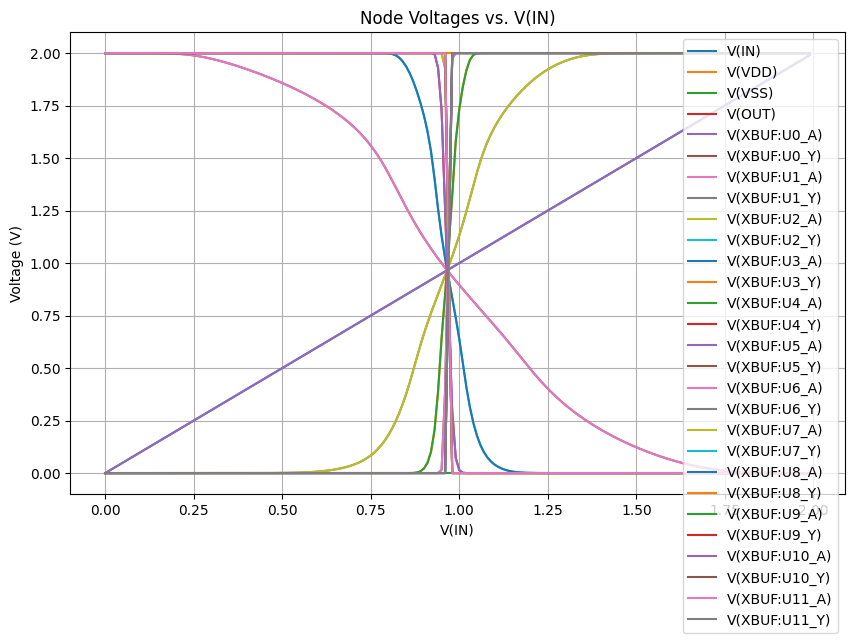

In [3]:
# Remove non-numeric rows (e.g., simulation end text)
df_clean = df[pd.to_numeric(df[df.columns[1]], errors='coerce').notnull()]

plt.figure(figsize=(10, 6))
for col in df_clean.columns[1:]:  # skip the index/time column
    plt.plot(df_clean[df.columns[1]], df_clean[col], label=col)
plt.xlabel(df_clean.columns[1])
plt.ylabel('Voltage (V)')
plt.title('Node Voltages vs. ' + df_clean.columns[1])
plt.legend()
plt.grid(True)
plt.show()

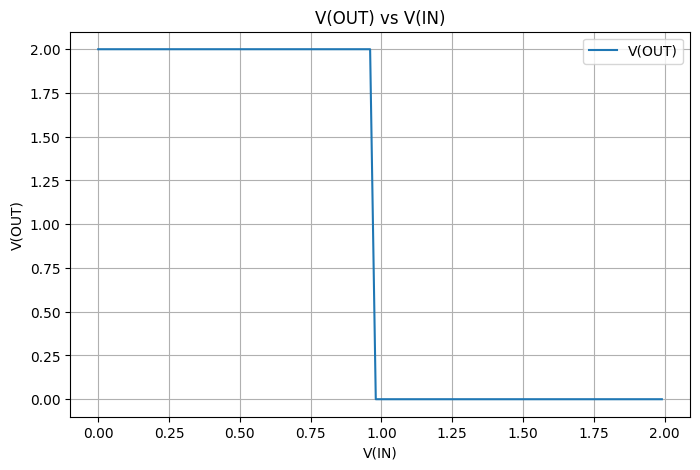

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(df_clean['V(IN)'], df_clean['V(OUT)'], label='V(OUT)')
plt.xlabel('V(IN)')
plt.ylabel('V(OUT)')
plt.title('V(OUT) vs V(IN)')
plt.legend()
plt.grid(True)
plt.show()